In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,1.71,2.43,NaN,127.0,NaN,3.06,0.28,NaN,5.64,NaN,NaN,1065.0
1,13.20,1.78,2.14,11.2,100.0,NaN,2.76,NaN,NaN,4.38,NaN,NaN,NaN
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,NaN,3.91,2.48,NaN,102.0,NaN,0.75,0.43,NaN,7.30,NaN,NaN,750.0
175,13.27,NaN,2.26,20.0,120.0,NaN,0.69,0.43,NaN,10.20,NaN,NaN,NaN
176,NaN,2.59,2.37,20.0,NaN,NaN,0.68,NaN,NaN,9.30,0.60,NaN,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	30
float64		column 2	15
float64		column 3	0
float64		column 4	15
float64		column 5	15
float64		column 6	61
float64		column 7	15
float64		column 8	31
float64		column 9	76
float64		column 10	15
float64		column 11	61
float64		column 12	76
float64		column 13	46


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,148.000000,163.000000,178.000000,163.000000,163.000000,117.000000,163.000000,147.000000,102.000000,163.000000,117.000000,102.000000,132.000000
mean,12.993108,2.324663,2.366517,19.399387,99.337423,2.265556,2.055215,0.366871,1.571275,5.057669,0.956376,2.608627,738.931818
std,0.804759,1.125455,0.274344,3.218686,14.369558,0.669554,1.004306,0.124525,0.570296,2.364317,0.226618,0.681452,311.423797
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.470000,0.130000,0.420000,1.280000,0.480000,1.270000,278.000000
25%,12.355000,1.585000,2.210000,17.200000,88.000000,1.650000,1.235000,0.270000,1.167500,3.065000,0.790000,2.002500,498.750000
50%,13.050000,1.830000,2.360000,19.400000,97.000000,2.400000,2.170000,0.340000,1.505000,4.600000,0.960000,2.780000,655.000000
75%,13.672500,3.030000,2.557500,21.000000,106.000000,2.800000,2.900000,0.450000,1.870000,6.225000,1.100000,3.170000,973.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,3.820000,1547.000000


<AxesSubplot:>

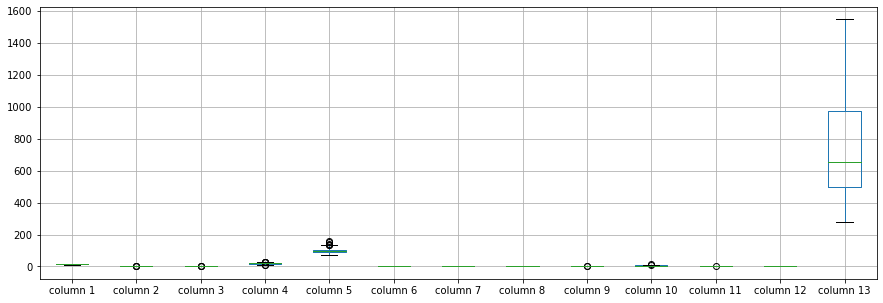

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.993108
column 2       2.324663
column 3       2.366517
column 4      19.399387
column 5      99.337423
column 6       2.265556
column 7       2.055215
column 8       0.366871
column 9       1.571275
column 10      5.057669
column 11      0.956376
column 12      2.608627
column 13    738.931818
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.140917,0.195969,-0.289955,0.220707,0.215583,0.175721,-0.150157,0.099267,0.546559,-0.090313,0.030204,0.597188
column 2,0.140917,1.000000,0.165257,0.260797,-0.042139,-0.421396,-0.407910,0.293027,-0.244731,0.248640,-0.517232,-0.471849,-0.149481
column 3,0.195969,0.165257,1.000000,0.451500,0.245776,0.058202,0.091177,0.215551,-0.088189,0.265631,-0.066267,-0.075988,0.238780
column 4,-0.289955,0.260797,0.451500,1.000000,-0.086253,-0.392743,-0.337937,0.387950,-0.325540,0.052387,-0.356690,-0.392396,-0.452748
column 5,0.220707,-0.042139,0.245776,-0.086253,1.000000,0.273083,0.164389,-0.224944,0.130633,0.157850,-0.017314,0.055993,0.367133
column 6,0.215583,-0.421396,0.058202,-0.392743,0.273083,1.000000,0.861068,-0.446120,0.653430,-0.115768,0.476032,0.723727,0.425362
column 7,0.175721,-0.407910,0.091177,-0.337937,0.164389,0.861068,1.000000,-0.552417,0.687566,-0.178285,0.557654,0.807435,0.467562
column 8,-0.150157,0.293027,0.215551,0.387950,-0.224944,-0.446120,-0.552417,1.000000,-0.388324,0.126724,-0.272354,-0.533207,-0.295235
column 9,0.099267,-0.244731,-0.088189,-0.325540,0.130633,0.653430,0.687566,-0.388324,1.000000,-0.035722,0.343749,0.553507,0.364772
column 10,0.546559,0.248640,0.265631,0.052387,0.157850,-0.115768,-0.178285,0.126724,-0.035722,1.000000,-0.540100,-0.452468,0.334227


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+91,13+91+91,13+91+91,13+91+91+91+91,13+91+91+91+91+91,13+91+91+91+91+91+91,13+91+91+91+91+91,13+91+91+91+91,13+91+91+91,13+91+91,13+91,13], vae_layer = False, seed = 910)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 719.752519087358
Epoch: 1 , loss: 725.2438132546165
Epoch: 2 , loss: 729.1281682794744
Epoch: 3 , loss: 720.9166564941406
Epoch: 4 , loss: 722.4719848632812
Epoch: 5 , loss: 722.0703457919034
Epoch: 6 , loss: 732.0349010120739
Epoch: 7 , loss: 724.3976884321733
Epoch: 8 , loss: 728.5676963112571
Epoch: 9 , loss: 728.3741621537642
Epoch: 10 , loss: 728.0442227450284
Epoch: 11 , loss: 727.6141357421875
Epoch: 12 , loss: 725.1578258167614
Epoch: 13 , loss: 724.979736328125
Epoch: 14 , loss: 722.4180186878551
Epoch: 15 , loss: 723.7673950195312
Epoch: 16 , loss: 719.9113714044744
Epoch: 17 , loss: 727.0430186878551
Epoch: 18 , loss: 725.6786554509944
Epoch: 19 , loss: 727.259238503196
Epoch: 20 , loss: 724.0565185546875
Epoch: 21 , loss: 721.1912619850852
Epoch: 22 , loss: 723.5931673916904
Epoch: 23 , loss: 722.2404729669744
Epoch: 24 , loss: 719.4989013671875
Epoch: 25 , loss: 710.8645352450284
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,5.062501,0.000000,0.0,7.753491,0.000000,0.303499,0.0,0.000000,-0.256093,0.0,0.563159,0.114667,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,-1.573200,0.0,-0.018834,-0.747653,0.0,0.225504,-1.778453,-805.341354
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
174,-7.692614,0.000000,0.0,-15.890788,0.000000,-0.773834,0.0,0.000000,-0.905214,0.0,0.370610,-0.268583,0.000000
175,0.000000,-3.195528,0.0,0.000000,0.000000,-0.821495,0.0,0.000000,-0.862957,0.0,-0.178019,-0.571385,-634.063873
176,-8.760911,0.000000,0.0,0.000000,-94.471241,-0.850820,0.0,-0.396900,-1.099419,0.0,0.000000,-0.329694,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4021.9601792574504, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.3690522464271384

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,19.292501,1.710000,2.43,23.353491,127.000000,3.103499,3.06,0.280000,2.033907,5.64,1.603159,4.034667,1065.000000
1,13.200000,1.780000,2.14,11.200000,100.000000,1.076800,2.76,0.241166,0.532347,4.38,1.275504,1.621547,244.658646
2,13.160000,2.360000,2.67,18.600000,101.000000,2.800000,3.24,0.300000,2.810000,5.68,1.030000,3.170000,1185.000000
3,14.370000,1.950000,2.50,16.800000,113.000000,3.850000,3.49,0.240000,2.180000,7.80,0.860000,3.450000,1480.000000
4,13.240000,2.590000,2.87,21.000000,118.000000,2.800000,2.69,0.390000,1.820000,4.32,1.040000,2.930000,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.45,20.500000,95.000000,1.680000,0.61,0.520000,1.060000,7.70,0.640000,1.740000,740.000000
174,5.707386,3.910000,2.48,7.109212,102.000000,1.026166,0.75,0.430000,0.504786,7.30,1.070610,1.291417,750.000000
175,13.270000,1.084472,2.26,20.000000,120.000000,0.768505,0.69,0.430000,0.487043,10.20,0.411981,0.988615,200.936127
176,4.409089,2.590000,2.37,20.000000,25.528759,0.799180,0.68,0.133100,0.360581,9.30,0.600000,1.290306,840.000000


In [20]:
imputations[-1].to_excel("Wine_AE_20(imp).xlsx", index=False, header=False)